# Milestone 3b: BGLibPy

Setup

In [1]:
import getpass
import logging
from pathlib import Path

from bluepysnap.api import Api

logging.basicConfig(level=logging.WARNING)

ORGANIZATION = "nse"
PROJECT = "test"

Paste the token from https://bbp.epfl.ch/nexus/web/

In [2]:
TOKEN = getpass.getpass()

 ·······································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································

In [3]:
api = Api(bucket=f"{ORGANIZATION}/{PROJECT}", token=TOKEN, debug=False)

## Instantatiate a BGLibPy SSim object from a Simulation KG id

### Fetch a simulation

In [4]:
simulation_id = "https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/SimulationNexusTask_entity_managemen__gpfs_bbp_cscs_c__03c48af236"

simulation = api.get_entity_by_id(simulation_id, tool="bglibpy")
print(simulation.resource)

{
    context: https://bbp.neuroshapes.org
    id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/SimulationNexusTask_entity_managemen__gpfs_bbp_cscs_c__03c48af236
    type: Simulation
    brainLocation:
    {
        brainRegion:
        {
            id: http://api.brain-map.org/api/v2/data/Structure/549
            label: Thalamus
        }
    }
    ca: 2.0
    description: duration=3000 target=Mosaic Ca=2.0
    duration: 3000
    endedAtTime: 2019-12-19T12:52:54.050054
    mg: 1.0
    name: Campaign simulation
    path: /gpfs/bbp.cscs.ch/project/proj82/simulations/Thalamus/20191210/spontaneous_rest/TC2TC_W0p0/seed449150
    seed: 449150
    startedAtTime: 2019-12-19T12:52:47.064924
    status: Done
    subject:
    {
        id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/a813ddf2-8031-4342-8da4-e27ccd0218fb
        type: Subject
    }
    target: Mosaic
    wasStartedBy:
    {
        id: https://bbp.epfl.ch/nexus/v1/resources/nse/test/_/SimulationCampaignNexusTask_entit

### Materialize the instance (requires Neurodamus)

We need to set the `HOC_LIBRARY_PATH` and `BGLIBPY_MOD_LIBRARY_PATH` before calling `instance` for bglibpy to find the required assets.

In [5]:
import os

os.environ["HOC_LIBRARY_PATH"] = "/gpfs/bbp.cscs.ch/project/proj30/home/jupyter/NSETM-1298-entities/sources/neurodamus-core/hoc"
os.environ["BGLIBPY_MOD_LIBRARY_PATH"] = "/gpfs/bbp.cscs.ch/project/proj30/home/jupyter/NSETM-1298-entities/sources/x86_64/.libs/libnrnmech.so"

ssim = simulation.instance

### Use BGLibPy SSim
Commands from https://bbpteam.epfl.ch/documentation/projects/BGLibPy/latest/tutorial.html

In [6]:
gid = 1
ssim.instantiate_gids([gid])
cell = ssim.cells[gid]
ssim.run(t_stop=1000)

--No graphics will be displayed.


Plot the result

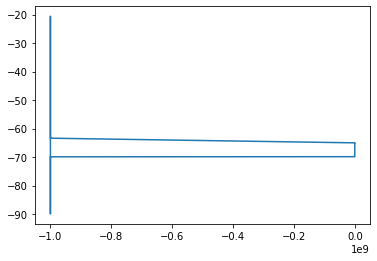

In [7]:
import pylab
pylab.plot(cell.get_time(), cell.get_soma_voltage())
pylab.show()